**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1a) Load the dataset and implement the K Means algorithm. You need to find the optimal number of clusters using the
> i) elbow method

> ii) silhoette method



1b) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

1c) Experiment with different distance measures [Euclidean distance, Manhattan distance].

1d) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.


1e) Visualize the dataset to depict the clusters formed. (prefer T-SNE)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

>Visualize the clusters obtained using these linkages and compare. 



In [132]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
#implement elbow method from scratch
def elbow(X,K):
   Inertia = []

   for k in range(1,K+1):
    # Building and fitting the model
      model = Kmeans(K=k,dist_type="eucledian",selection = "forgy")
      model.fit(X)
      Inertia.append(model.inertia())
   return Inertia
       

In [ ]:
#implement silhouette method from scratch
def silhouette():



In [112]:
#implement Kmeans from scratch
class Kmeans:

  def __init__(self,K = 3,dist_type = "eucledian", selection = "forgy"):
    self.K = K
    self.clusters = [[] for i in range(K)]
    self.mean = np.empty(K)
    self.dist_type = dist_type
    self.selection = selection

  def distance(self, diff):
    if self.dist_type == "eucledian":
      # print(np.linalg.norm(diff,axis = 1).shape)
      return np.linalg.norm(diff)
    else:
      return np.argmin(np.sum(abs(diff),axis = 1))
      
  def assign_means(self):
    if self.selection == "forgy":
      return self.X[np.random.choice(self.X.shape[0],size=(self.K),replace=False)]
    else:
      idx = np.random.choice(self.X.shape[0],size=(self.K),replace=True)
      means = np.zeros(self.K)
      for i in range(self.K):
          means[i] = np.mean(self.X[idx == i])
      return means
    
  def fit(self, X):
    self.X = X
    
    self.mean = self.assign_means()
    # print(self.mean.shape)
    for _ in range(100):
      clusters = [[] for i in range(self.K)]
      for i in range(X.shape[0]):
        d = np.zeros(self.K)
        for j in range(self.K):
          d[j] = self.distance(X[i] - self.mean[j])
        closest = np.argmin(d)
        clusters[closest].append(i)
      self.clusters = clusters
      
      new_mean = np.zeros_like(self.mean)
      for i,c in enumerate(self.clusters):
        new_mean[i] = np.mean(self.X[c])

      if np.linalg.norm(new_mean - self.mean) < 0.01:
        break
      
      self.mean = new_mean

  def Labels(self):
    self.labels = np.zeros(self.X.shape[0])
    for i,c in enumerate(self.clusters):
      for j in c:
        self.labels[j] = i
    return self.labels

  def inertia(self):
    ine = 0
    for i in range(len(self.clusters)):
      ine += np.sum((self.X[self.clusters[i]]-self.mean[i])**2)
    return ine

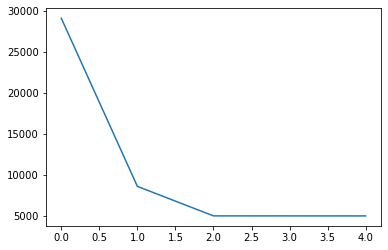

In [118]:
x = np.array([[1,1],[2,2],[0,0],[100,0],[-100,-100]])
model = Kmeans(K=3,dist_type="eucledian",selection = "forgy")
model.fit(x)
labels = model.Labels()
labels

plt.plot(elbow(x,K = 5))

In [111]:
model.mean

array([[-100, -100],
       [  50,   50],
       [   1,    1]])

In [134]:
from keras.datasets import fashion_mnist
from tqdm import tqdm

(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# you can performs your training on train/test dataset alone if there are computational issues

In [138]:
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2])
testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2])

Hierarchical clustering

In [120]:
# implement hierarchical clustering ( you can use scikit module)
from sklearn.cluster import AgglomerativeClustering

def hierarchical_clustering(X, K, method="single"):
    cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=method)  
    cluster.fit_predict(X)

In [139]:
#visualize a dendogram
import scipy.cluster.hierarchy as shc

def dendogram(data, method="single"):
    linkage_matrix = shc.linkage(data, method=method)
    plt.figure(figsize=(10, 7))  
    dend = shc.dendrogram(linkage_matrix)

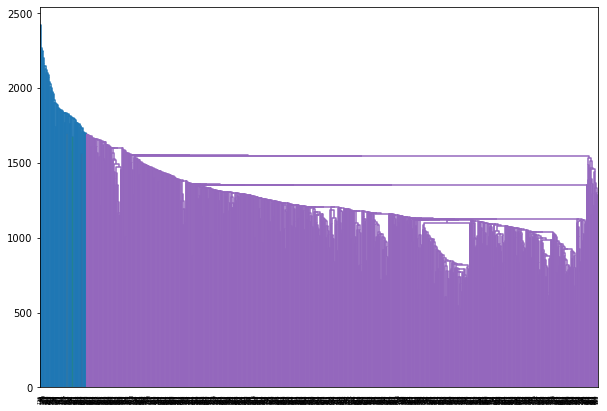

In [140]:
dendogram(trainX[:1000, :])

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: </br>
</br>
</br>
</br>





In [ ]:
#visualisation of clusters using single linkage and complete linkage





**Question:** Mention the differences observed using single and complete linkage:

Answer: </br>
</br>
</br>
</br>